# Vehicle Classification

## Exploratory Data Analysis


In [1]:
import os

import cv2
import matplotlib.pyplot as plt
import pandas as pd


### Load dataset

In [2]:
labels = pd.read_csv('../data/car_dataset_labels.csv')
labels.head()

,img_name,class,subset
0,000001.jpg,AM General Hummer SUV 2000,train
1,000002.jpg,AM General Hummer SUV 2000,train
2,000003.jpg,AM General Hummer SUV 2000,train
3,000004.jpg,AM General Hummer SUV 2000,train
4,000005.jpg,AM General Hummer SUV 2000,train


### Get some stats

Complete the function `get_stats()` below:

In [15]:
labels.describe()

,img_name,class,subset
count,16185,16185,16185
unique,16185,196,2
top,000001.jpg,GMC Savana Van 2012,train
freq,1,136,8144


In [20]:
def get_stats(df):
    """
    Check number of:
        1. Classes
        2. Training samples
        3. Testing samples
    """
    
    # TODO: Put here the number of classes 
    class_num = df['class'].nunique()
    
    # TODO: Put here the number of training images 
    train_num = df[df.subset == 'train'].shape[0]

    # TODO: Put here the number of test images 
    test_num = df[df.subset == 'test'].shape[0]

    return class_num, train_num, test_num


In [21]:
# Don't change this cell
class_num, train_num, test_num = get_stats(labels)
print(f'Our dataset has {class_num} classes, {train_num} train images, {test_num} test images')

Our dataset has 196 classes, 8144 train images, 8041 test images


## Working with images and OpenCV

In [3]:
# Load an image
img = cv2.imread('../data/car_ims/000004.jpg')

print(f'Image type: {type(img)}')
print(f'Image shape: {img.shape} (Height x Width x Channels)')
print(f'Image min value: {img.min()}')
print(f'Image max value: {img.max()}')


Image type: <class 'numpy.ndarray'>
Image shape: (188, 250, 3) (Height x Width x Channels)
Image min value: 0
Image max value: 255


**Important Note:** An image loaded using OpenCV is just a Numpy array, keep in mind you can make use of all the numpy functionalities you know here.

In [4]:
# We can access to pixel values
px = img[100,100] 
print(px)


[209 223 222]


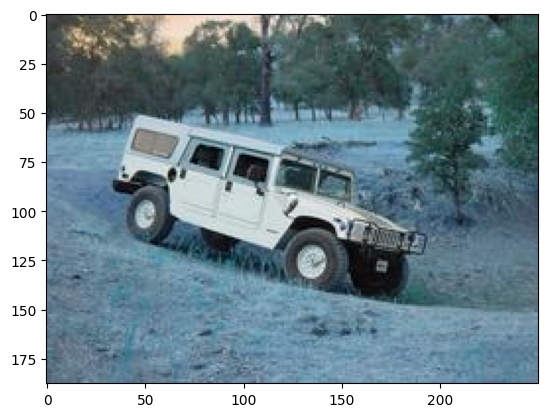

In [5]:
# Display
plt.imshow(img)
plt.show()

**Important Note:** OpenCV uses BGR format while matplotlib uses RGB.

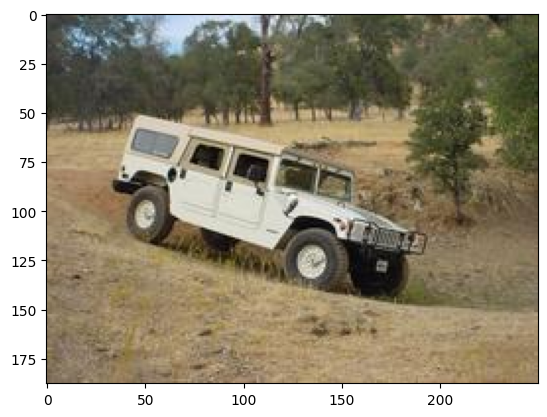

In [6]:
# Convert from RGB to RGB first
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Then display the converted image
plt.imshow(img_rgb)
plt.show()

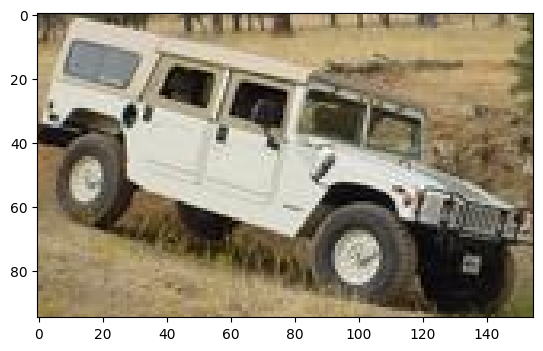

In [7]:
# Crop and extract a certain region from an image
crop = img_rgb[50:145, 35:190]
plt.imshow(crop)
plt.show()

## Load and display some images and their label

In [13]:
sampled_rows = labels.sample(20, replace=False, random_state=123)
for _, row in sampled_rows.iterrows():
    im = cv2.imread(os.path.join('../data/car_ims', row["img_name"]))
    im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.imshow(im_rgb)
    plt.title(f'{row["class"]} - {row["img_name"]}')
    plt.show()


False


[ WARN:0@180.678] imread_('../data/car_ims/002912.jpg'): can't open/read file: check file path/integrity


error: OpenCV(3.4.17) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
